# **Gradient Descent**

In [66]:
import numpy as np
import pandas as pd

In [67]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [68]:
df.shape

(400, 5)

In [69]:
X = df.drop(columns=['User ID', 'Purchased','Gender'])
y = df['Purchased']

X.shape,y.shape

((400, 2), (400,))

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
X_train.shape

(320, 2)

In [74]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [75]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Admin\Deep Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
import time

In [78]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

**Batch Gradient Descent**

In [79]:
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=320) 
end = time.time()

print(end - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3594 - loss: 4634.8594
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.3594 - loss: 4316.1089
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3594 - loss: 4088.9480
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3594 - loss: 3901.0066
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3594 - loss: 3735.7429
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3594 - loss: 3585.4917
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.3594 - loss: 3445.9797
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.3594 - loss: 3314.5405
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3594 - loss: 3189.3779
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3594 - loss: 3069.2075
5.187721252441406


In [80]:
import matplotlib.pyplot as plt

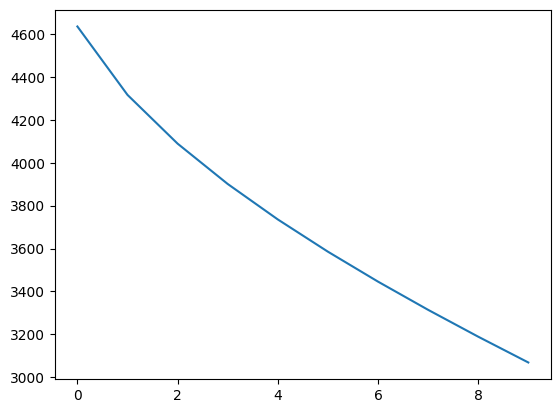

In [81]:
plt.plot(history.history['loss'])